In [4]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the Input Rate of Broker-1
df1b = pd.read_csv("Brok1IR.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-07-30 23:50:58,45117937,my-cluster-metrics-kafka-0
1,2021-07-30 23:51:28,54311395,my-cluster-metrics-kafka-0
2,2021-07-30 23:51:58,65349548,my-cluster-metrics-kafka-0


In [5]:
#Average Input Rate before rebalancing
irbr1 = df1b[(df1b['timestamp'] >= '2021-07-30 23:50:58') & (df1b['timestamp'] <= '2021-07-31 00:21:28')]
irbr1.head(3)
irbr1avg = irbr1['values'].mean()
print(irbr1avg)
irbr1.describe()

494903384.38709676


,values
count,6.200000e+01
mean,4.949034e+08
std,2.619368e+08
min,4.511794e+07
25%,2.602180e+08
50%,5.065032e+08
75%,7.113668e+08
max,9.439483e+08


In [6]:
#Average Input Rate During rebalancing
irdr1 = df1b[(df1b['timestamp'] >= '2021-07-31 00:21:58') & (df1b['timestamp'] <= '2021-07-31 00:25:28')]
irdr1.head(3)
irdr1avg = irdr1['values'].mean()
print(irdr1avg)
irdr1.describe()

994312474.125


,values
count,8.000000e+00
mean,9.943125e+08
std,1.898454e+07
min,9.658612e+08
25%,9.825575e+08
50%,9.936975e+08
75%,1.004715e+09
max,1.025199e+09


In [7]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1ir = ttest_ind(irdr1['values'], irbr1['values'])
print(resb1ir)

Ttest_indResult(statistic=5.356861268565343, pvalue=1.0855433891572006e-06)


In [8]:
irbr1.drop(['pod'], axis=1, inplace=True)
irbr1.head(10)
irbr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  62 non-null     datetime64[ns]
 1   values     62 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
irdr1.drop(['pod'], axis=1, inplace=True)
irdr1.head(10)
irdr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 62 to 69
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  8 non-null      datetime64[ns]
 1   values     8 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


Text(0.5, 1.0, 'Broker1 Input Rate')

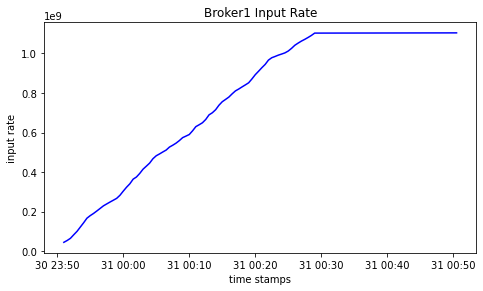

In [10]:
from datetime import datetime
#Input Rate for the entire load test
i1=[]
for dat in df1b.timestamp:
    # print (dat)
    i1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(i1,df1b['values'], 'b')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('input rate')
axe1.set_title('Broker1 Input Rate')
#fig1.tight_layout()

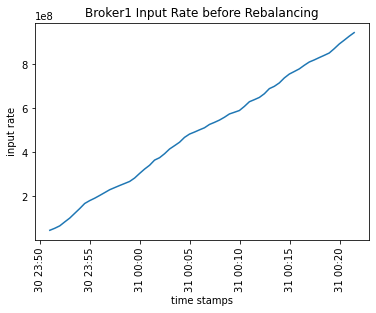

In [11]:
#Input Rate before rebalancing
b1=[]
for dat in irbr1.timestamp:
    # print (dat)
    b1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b1,irbr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker1 Input Rate before Rebalancing')
plt.show()

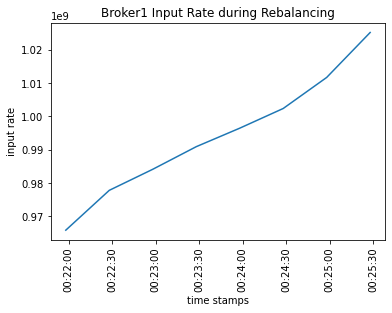

In [12]:
#Input Rate during rebalancing
d1=[]
for dat in irdr1.timestamp:
    # print (dat)
    d1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d1,irdr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker1 Input Rate during Rebalancing')
plt.show()

In [21]:
# DA on the Input Rate of Broker-2
df2b = pd.read_csv("Brok2IR.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-07-30 23:50:54,21138643,my-cluster-metrics-kafka-1
1,2021-07-30 23:51:24,34276911,my-cluster-metrics-kafka-1
2,2021-07-30 23:51:54,45789601,my-cluster-metrics-kafka-1


In [22]:
#Average Input Rate before rebalancing
irbr2 = df2b[(df2b['timestamp'] >= '2021-07-30 23:50:54') & (df2b['timestamp'] <= '2021-07-31 00:21:54')]
irbr2.head(3)
irbr2avg = irbr2['values'].mean()
print(irbr2avg)
irbr2.describe()

406740253.3015873


,values
count,6.300000e+01
mean,4.067403e+08
std,2.281026e+08
min,2.113864e+07
25%,2.265840e+08
50%,4.007304e+08
75%,6.053177e+08
max,7.751971e+08


In [23]:
#Average Input Rate During rebalancing
irdr2 = df2b[(df2b['timestamp'] >= '2021-07-31 00:22:24') & (df2b['timestamp'] <= '2021-07-31 00:25:54')]
irdr2.head(3)
irdr2avg = irdr2['values'].mean()
print(irdr2avg)
irdr2.describe()

824327580.375


,values
count,8.000000e+00
mean,8.243276e+08
std,2.283507e+07
min,7.908834e+08
25%,8.091040e+08
50%,8.243424e+08
75%,8.411878e+08
max,8.555145e+08


In [24]:
#T-Stats Analysis
resb2ir = ttest_ind(irdr2['values'], irbr2['values'])
print(resb2ir)

Ttest_indResult(statistic=5.142641093512631, pvalue=2.417862838463384e-06)


In [25]:
irbr2.drop(['pod'], axis=1, inplace=True)
irbr2.head(10)
irbr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  63 non-null     datetime64[ns]
 1   values     63 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
irdr2.drop(['pod'], axis=1, inplace=True)
irdr2.head(10)
irdr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 63 to 70
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  8 non-null      datetime64[ns]
 1   values     8 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


Text(0.5, 1.0, 'Broker2 Input Rate')

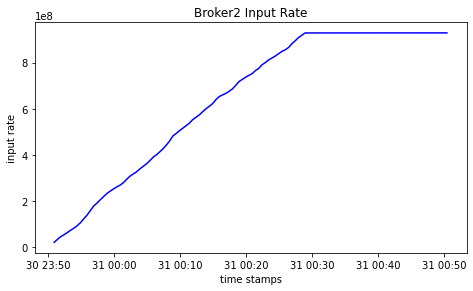

In [27]:
from datetime import datetime
#Input Rate for the entire load test
i2=[]
for dat in df2b.timestamp:
    # print (dat)
    i2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(i2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('input rate')
axe2.set_title('Broker2 Input Rate')
#fig1.tight_layout()

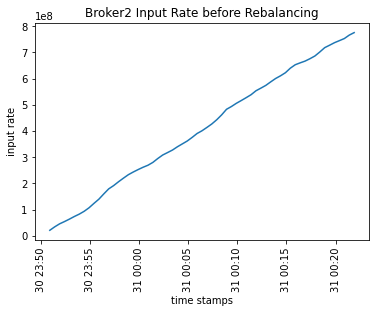

In [28]:
#Input Rate before rebalancing
b2=[]
for dat in irbr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,irbr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker2 Input Rate before Rebalancing')
plt.show()

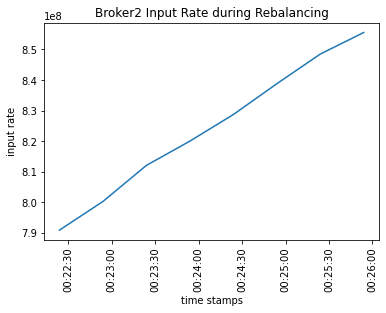

In [29]:
#Input Rate during rebalancing
d2=[]
for dat in irdr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,irdr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker2 Input Rate during Rebalancing')
plt.show()

In [32]:
# DA on the Input Rate of Broker-3
df3b = pd.read_csv("Brok3IR.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-07-30 23:51:03,35281199,my-cluster-metrics-kafka-2
1,2021-07-30 23:51:33,55795077,my-cluster-metrics-kafka-2
2,2021-07-30 23:52:03,71542016,my-cluster-metrics-kafka-2


In [33]:
#Average Input Rate before rebalancing
irbr3 = df3b[(df3b['timestamp'] >= '2021-07-30 23:51:03') & (df3b['timestamp'] <= '2021-07-31 00:21:33')]
irbr3.head(3)
irbr3avg = irbr3['values'].mean()
print(irbr3avg)
irbr3.describe()

504864664.5322581


,values
count,6.200000e+01
mean,5.048647e+08
std,2.680529e+08
min,3.528120e+07
25%,2.820712e+08
50%,5.163801e+08
75%,7.533701e+08
max,9.176362e+08


In [34]:
#Average Input Rate During rebalancing
irdr3 = df3b[(df3b['timestamp'] >= '2021-07-31 00:22:03') & (df3b['timestamp'] <= '2021-07-31 00:25:33')]
irdr3.head(3)
irdr3avg = irdr3['values'].mean()
print(irdr1avg)
irdr3.describe()

994312474.125


,values
count,8.000000e+00
mean,9.505713e+08
std,1.539839e+07
min,9.307838e+08
25%,9.408621e+08
50%,9.480935e+08
75%,9.572562e+08
max,9.781792e+08


In [35]:
#T-Stats Analysis
resb3ir = ttest_ind(irdr3['values'], irbr3['values'])
print(resb3ir)

Ttest_indResult(statistic=4.672268076192817, pvalue=1.454283540411056e-05)


In [36]:
irbr3.drop(['pod'], axis=1, inplace=True)
irbr3.head(10)
irbr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  62 non-null     datetime64[ns]
 1   values     62 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
irdr3.drop(['pod'], axis=1, inplace=True)
irdr3.head(10)
irdr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 62 to 69
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  8 non-null      datetime64[ns]
 1   values     8 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


Text(0.5, 1.0, 'Broker3 Input Rate')

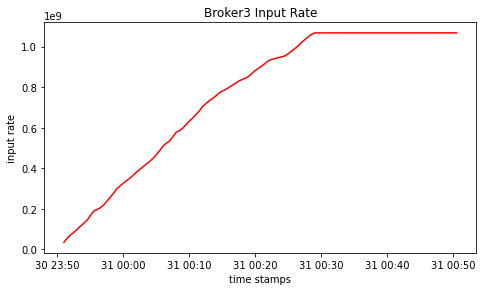

In [38]:
from datetime import datetime
#Input Rate for the entire load test
i3=[]
for dat in df3b.timestamp:
    # print (dat)
    i3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(i3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('input rate')
axe3.set_title('Broker3 Input Rate')
#fig1.tight_layout()

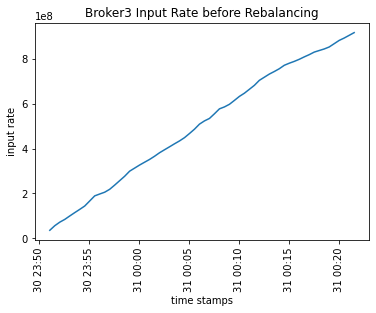

In [39]:
#Input Rate before rebalancing
b3=[]
for dat in irbr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,irbr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker3 Input Rate before Rebalancing')
plt.show()

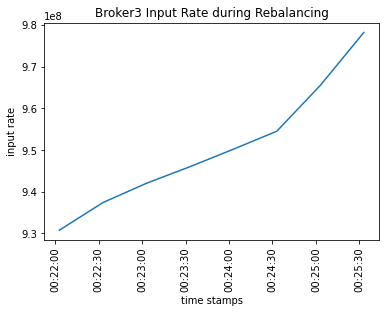

In [40]:
#Input Rate during rebalancing
d3=[]
for dat in irdr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,irdr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('input rate')
plt.title('Broker3 Input Rate during Rebalancing')
plt.show()